# Simple Statistics

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houed ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)
* URL in Zotero
* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [13]:
import pandas as pd

df = pd.read_csv("../../data/liedjes/liedjes.csv")

Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [14]:
len(df)

347

In [15]:
df['jaartal'].count()

343

In [16]:
df['vereniging_schrijver'].count()

332

In [17]:
draaitabel = pd.crosstab(df['vereniging_schrijver'], df['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,186?,All
vereniging_schrijver,,,,,,,,,,,,,,,,,,
amsterdam1849,0,0,0,6,22,0,0,0,16,16,0,0,0,0,0,0,0,60
amsterdam1857-1,0,0,0,0,0,0,0,0,0,0,12,14,0,24,0,0,2,52
arnhem1849,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4
denbosch1849,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2
denhaag1843,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,11
haarlem1851,0,0,0,0,0,4,0,0,11,0,0,0,8,0,0,0,0,23
leiden1854,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3
middelburg1847,2,3,8,2,4,6,10,6,6,6,6,2,5,4,3,15,0,88
rotterdam1849,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Het aantal liedjes in deze draaitabel (aka kruistabel) is niet hetzelfde als de lengte van de dataframe, omdat niet van alle liedjes een jaartal en/of een vereniging bekend is.

In [18]:
# de functie value_counts() ordent op de waarde
df['jaartal'].value_counts()

1856    62
1854    42
1853    35
1861    28
1855    28
1852    26
1857    22
1858    18
1859    16
1863    15
1860    13
185?    12
1851     8
1850     8
1862     3
1849     3
1848     2
186?     2
Name: jaartal, dtype: int64

<AxesSubplot:xlabel='jaartal'>

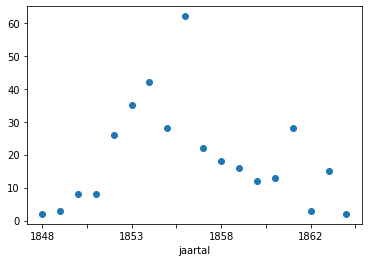

In [19]:
df.groupby('jaartal').size().plot(style = "o")

Nu per vereniging:

<AxesSubplot:xlabel='vereniging_schrijver'>

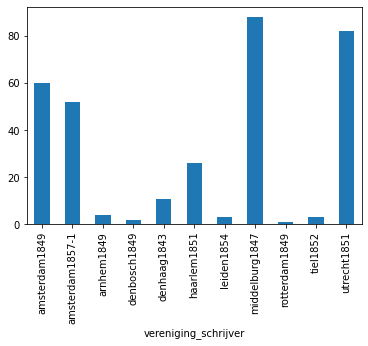

In [20]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

df.groupby('vereniging_schrijver').size().plot(kind = "bar") 

Welke auteurs hebben meer dan twee liedjes geschreven?

In [21]:
df['schrijver'].value_counts().loc[lambda x : x > 2]

M. Smidt               20
J.H.C. Venman          16
C. Mommaas             15
J.C. Paap               8
J.H. Regenboog          6
J. Breeman              6
J.P. Nobels             5
P.G. van de Kamp        5
R. Ruitenschild         5
J.J. van Stempfoort     4
B. Kuit                 4
C. Boss                 4
B. Lageman              4
J.H. Dortmond           4
H. van Nifterick        4
H. Everts               3
J.K. de Regt            3
J. van den Berg         3
J.P. Dieterich          3
P.A. van Doorn          3
F.W. Vislaake           3
C. Regenboog            3
J. Stom                 3
J.H.F. Bartels          3
M. Uitenbosch           3
Name: schrijver, dtype: int64

In [22]:
df['wijze'].value_counts().loc[lambda x : x > 2]

Wien Neerlands bloed                        45
Henri's drinklied                           28
De wereld is in rep en roer                 20
Io Vivat                                    17
De Koning leef                              12
Wie praalt aan 't hoofd der Heldenstoet     11
God save the king                           10
Schep vreugde in 't leven                    8
Eens werd er aan de zeeuwsche kust           7
Wij leven vrij, wij leven blij               6
Is 't u bekend, getrouwe burgerscharen?      4
Wij zijn lustig                              4
Schilder! ‘k wou mij zelv’ eens zien         3
Al is het prinsje nog zo klein, hoezee!      3
Ziet, vrienden, welk een schoone morgen.     3
Wat wordt het laat, de klok slaat acht!      3
O groote koopman in tabak                    3
Aan tafel dan, dat gulle vreugd              3
Goeden morgen, mijn heer Becker              3
Zoutmans glorie                              3
Brulant d'amour                              3
Name: wijze, 

In [23]:
df_subset = df.groupby("wijze").filter(lambda x: len(x) > 5)
draaitabel = pd.crosstab(df_subset['wijze'], df_subset['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,185?,1860,1861,1862,1863,All
wijze,,,,,,,,,,,,,,,,,,
De Koning leef,0,0,0,0,0,2,2,1,4,0,0,0,0,1,0,0,1,11
De wereld is in rep en roer,0,0,0,0,2,0,1,2,6,1,1,2,1,0,3,1,0,20
Eens werd er aan de zeeuwsche kust,0,0,0,0,1,1,0,1,3,1,0,0,0,0,0,0,0,7
God save the king,1,0,1,1,0,2,1,2,0,0,0,0,0,1,1,0,0,10
Henri's drinklied,0,0,0,0,3,1,5,0,8,5,1,1,0,0,3,0,1,28
Io Vivat,0,1,0,0,0,3,3,2,2,0,2,0,2,1,0,0,1,17
Schep vreugde in 't leven,0,0,1,0,0,0,1,0,2,1,1,0,0,0,2,0,0,8
Wie praalt aan 't hoofd der Heldenstoet,0,0,0,1,1,2,1,0,2,1,1,1,0,1,0,0,0,11
Wien Neerlands bloed,0,0,1,3,2,4,5,0,9,2,1,4,0,4,6,1,3,45


Hoeveel boekjes zijn er gedigitaliseerd en welke boekjes zijn dat? Het staat niet in de liedjes-csv, maar kan worden afgeleid uit de id's van de liedjes. Elke identifier begint immers met een identifier van het boekje. Dus: we knippen de id op langs het "-"-teken en plakken alles weer aan elkaar, behalve de laatste.

In [24]:
liedjesList = df['id'].tolist()
boekjesList = []
for liedje in liedjesList:
    liedjeSplit = liedje.split("-")
    boekje = liedjeSplit[0]
    for i in range(len(liedjeSplit) - 2): boekje = boekje + "-" + liedjeSplit[i + 1]
    if not (boekje in boekjesList): boekjesList.append(boekje)
boekjesList.sort()
boekjesList

['album1856',
 'amsterdam1849-feestbundel1851',
 'amsterdam1849-feestliederen1852',
 'amsterdam1849-feestliederen1857',
 'amsterdam1857-1-feestboekje1859',
 'amsterdam1857-1-feestboekje1861',
 'amsterdam1857-1-feestliederen1861',
 'amsterdam1857-1-klagt',
 'amsterdam1857-1-liederen1858',
 'amsterdam1857-1-liederen1858b',
 'amsterdam1857-1-volkslied1861',
 'arnhem1849-zangcoupletten1856',
 'haarlem1851-feestliederen1860',
 'haarlem1851-iisgdossier',
 'middelburg1847-feestbundel1864',
 'reglement185?',
 'utrecht1851-feestbundel1855',
 'utrecht1851-feestzangen1853',
 'utrecht1851-feestzangen1854']

In [25]:
len(boekjesList)

19